<a href="https://colab.research.google.com/github/SpecularAura/DAV-SEM5/blob/master/DAV_Experiment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experiment - 3: Multiple Linear Regression in Python


**Aim:** To study and implement Multiple Linear Regression

**Lab Outcomes (LO):** Implement various Regression techniques for prediction. (LO2)

**Task to be performed :**
1. List the packages to be used for Multiple Linear Regression in Python
2. Download the dataset from UCI Repository / Kaggle
  - Load data into Google Colab
  - Display the summary of the dataset
3. Create a model and fit it
4. Get the values : Coefficient of Determination, Intercept and Coefficients
5. Predict the response
6. Visualize the results with a graph
7. Repeat the steps 2 to 6 using R libraries

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection  import train_test_split

In [40]:
df = pd.read_csv("https://www.statlearning.com/s/Advertising.csv")
df = df.iloc[:,1:]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [41]:
df.isnull().any(axis=0)

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [43]:
# Separating Dependant and Independant Variables
X = df.drop('sales', axis=1)
y = df['sales']

In [44]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [45]:
def draw_scatter_plot(df, feature_name):
  fig = plt.figure(figsize=(5, 5))
  plt.scatter(df[feature_name], y)
  plt.show()

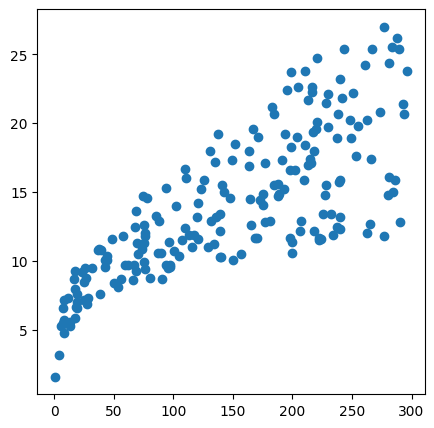

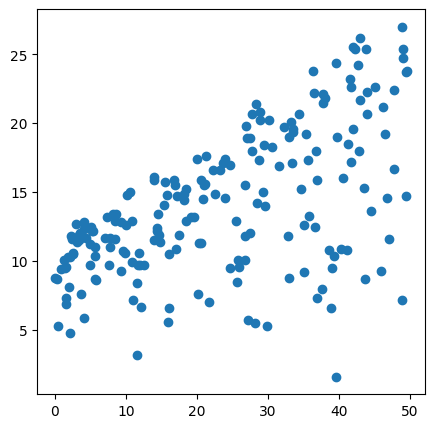

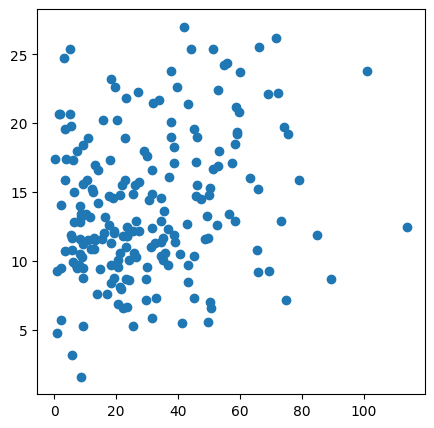

In [46]:
draw_scatter_plot(X, 'TV')
draw_scatter_plot(X, 'radio')
draw_scatter_plot(X, 'newspaper')

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [63]:
print("The equation of the model is:")
print("y = ", end="")
print(round(model.intercept_, 3), end="")
for idx, coef in enumerate(model.coef_):
  print(" + " if coef > 0 else "- ", end="")
  print(round(abs(coef), 3), end="")
  print(" * x" + str(idx + 1), end="")


The equation of the model is:
y = 3.001 + 0.045 * x1 + 0.189 * x2 + 0.003 * x3

In [51]:
y_pred = model.predict(X_test)

In [52]:
import math
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 3.323358676895511
Root Mean Squared Error: 1.823008139558217
R2 Score: 0.8839700798395381


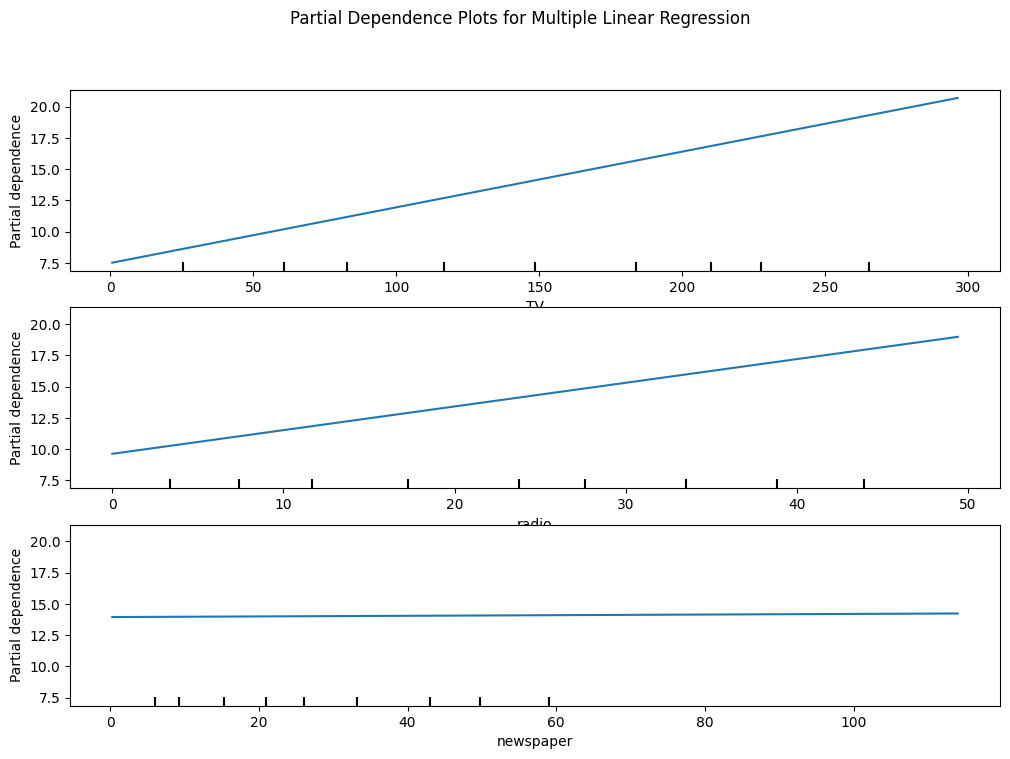

In [76]:
fig, ax = plt.subplots(3, sharex=False, sharey=False, figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X_train, [0, 1, 2], percentiles=(0,1), ax=ax)
plt.suptitle('Partial Dependence Plots for Multiple Linear Regression')
plt.show()


In [ ]:
install.packages('reshape2')

In [60]:
# library("dplyr")
library("ggplot2")
library("reshape2")
library("broom")
library("tidyverse")

In [61]:
df <- read.csv("https://www.statlearning.com/s/Advertising.csv")
head(df)

,X,TV,radio,newspaper,sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


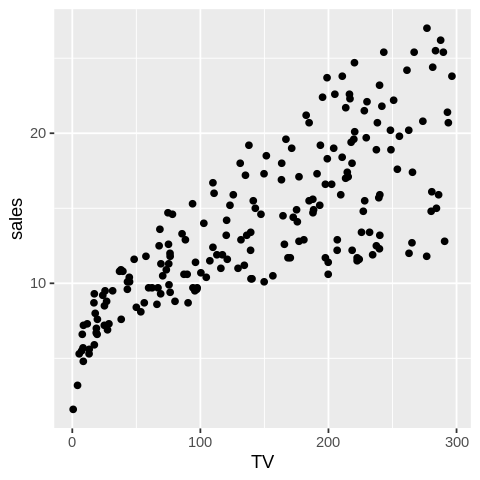

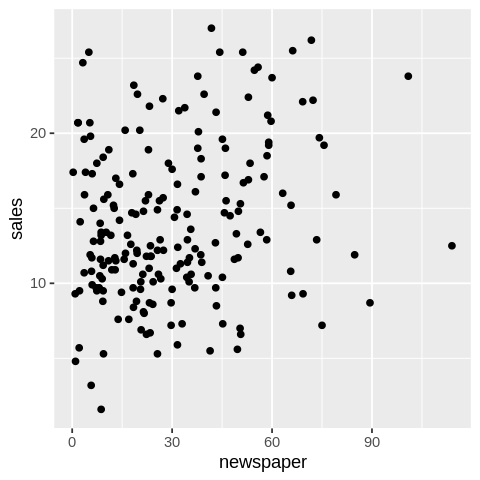

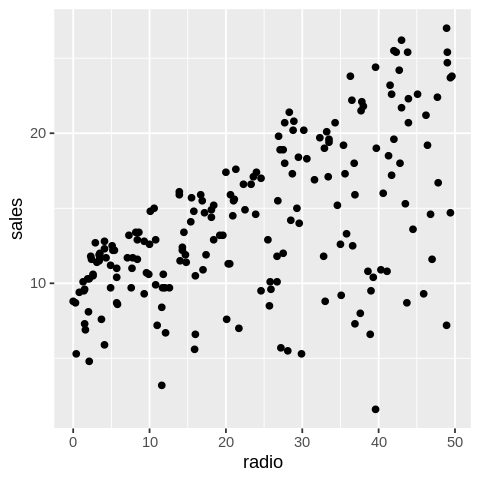

In [78]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(sub.df) +
    geom_point(aes(x = TV,
                   y = sales))

ggplot(sub.df) +
    geom_point(aes(x = newspaper,
                   y = sales))

ggplot(sub.df) +
    geom_point(aes(x = radio,
                   y = sales))

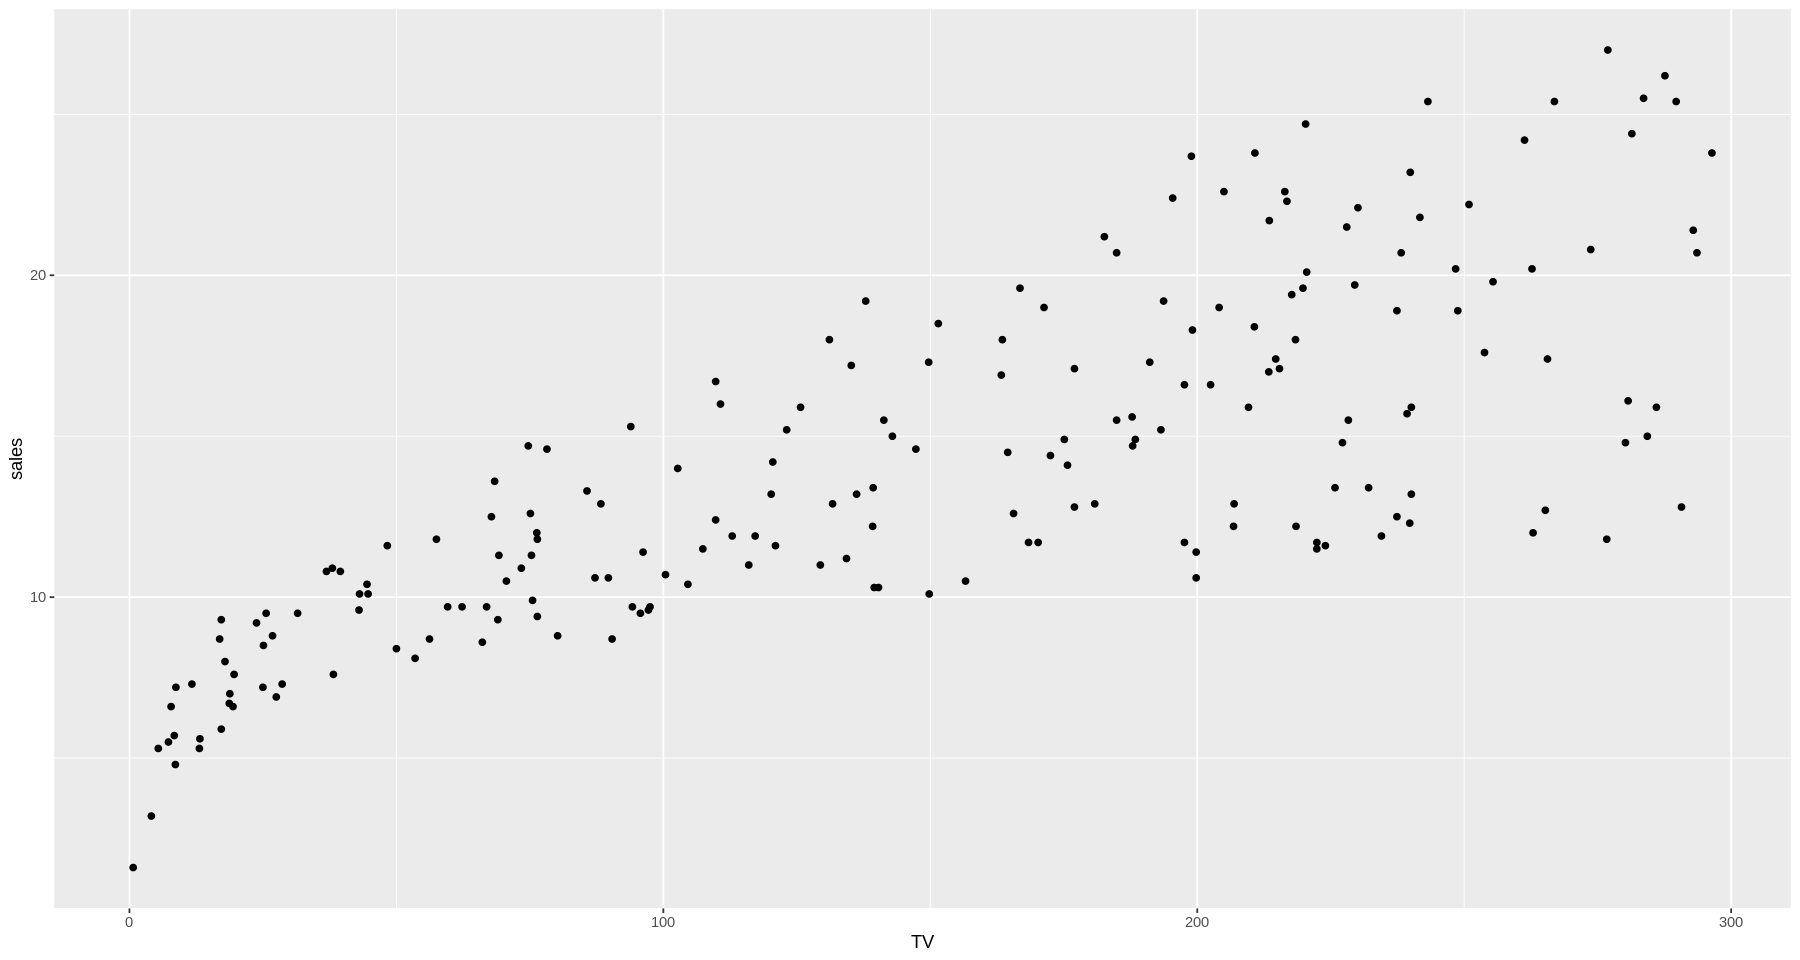

In [75]:
sub.df <- df %>%
  dplyr::select("TV", "radio", "newspaper", "sales") %>%
  na.omit()

model1 <- lm(sales ~ TV + newspaper + radio, data=sub.df)

In [67]:
summary(model1)


Call:
lm(formula = sales ~ TV + newspaper + radio, data = sub.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
newspaper   -0.001037   0.005871  -0.177     0.86    
radio        0.188530   0.008611  21.893   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


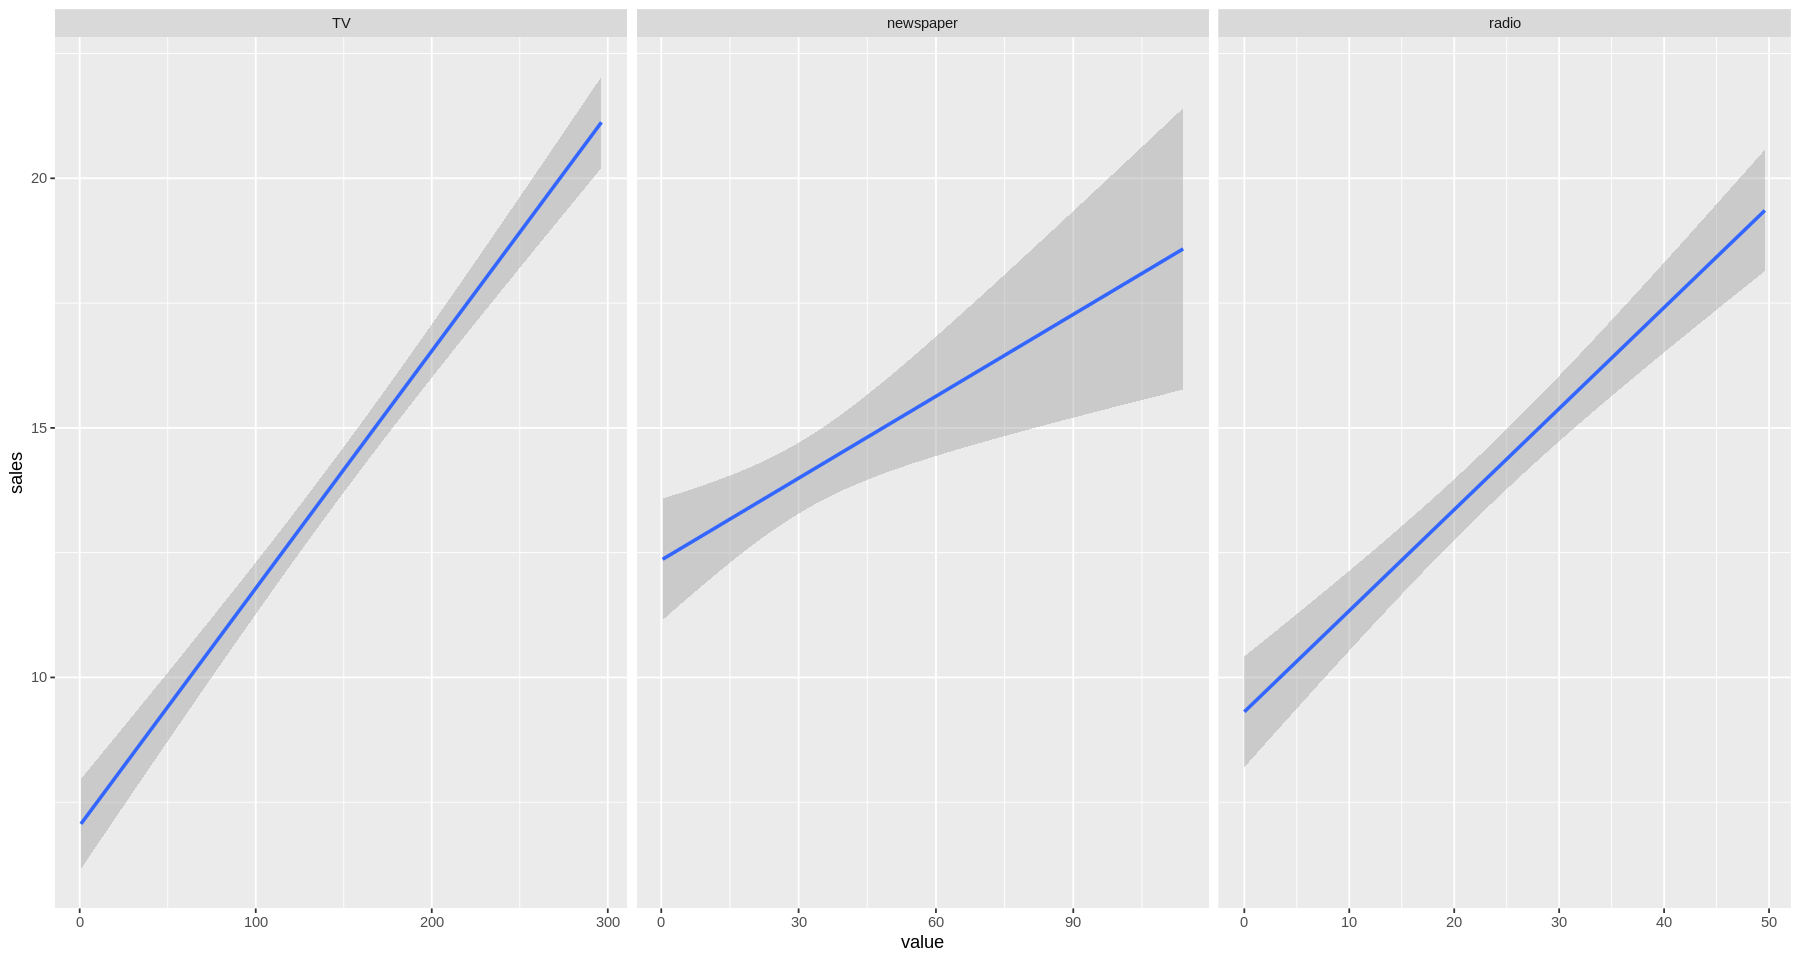

In [70]:
options(repr.plot.width=15, repr.plot.height=8)
model1 %>%
  augment() %>%
  melt(measure.vars = c("TV", "newspaper", "radio"), variable.name = c("IV")) %>%
  ggplot(., aes(value, sales)) +
  geom_smooth(method = "lm") +
  facet_wrap(~IV, scales = "free_x")

## Outcome :
* Understood the concept of Multiple Linear Regression
* Explored the packages in Python and R
* Performed Multiple Linear Regression using the Libraries in Python and R